In [3]:
!pip install openpyxl
!pip install imbalanced-learn
!pip3 install ipympl
!pip install shapely
!pip install SciencePlots 
!pip install seaborn
!pip install tqdm
!pip install ipywidgets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import os, sys
from numpy import nan
import re
import ipympl
# from IPython.core.display import display, HTML
import ipywidgets
import json
from os import listdir
import glob
import math
from IPython.display import Image, display, HTML
from shapely.geometry import mapping
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, mean_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut, cross_validate
from sklearn.impute import SimpleImputer
from tqdm.notebook import tqdm
from sklearn.svm import SVC
from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE
from scipy.stats import ks_2samp
from scipy import stats
np.seterr(divide='ignore', invalid='ignore')
pd.options.display.max_columns = 100
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# Step 1: Data Acquisition

In [274]:
# maize_data = pd.read_csv('maize_2018_2019_unl_spectra.csv')
# mdf = maize_data
# mdf.head(5)
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'


udf = pd.read_csv('uae.csv')
udf.head(5)

,FID,Lon,Lat,TOC,clay,silt,sand,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,54.736553,24.236353,0.22,0,1.0,98.0,0.089311,0.101862,0.116344,0.117707,0.113324,0.113424,0.115095,0.110248,0.103506,0.105503,0.110169,0.112541,0.118426,0.115746,0.105909,0.107894,0.107123,0.109696,0.117092,0.117855,0.119902,0.121461,0.116911,0.112778,0.115075,0.119952,0.121716,0.123712,0.124466,0.123697,0.121629,0.121883,0.124804,0.122874,0.119764,0.123741,0.127166,0.126157,0.124842,0.123106,0.122967,0.125440,0.125761,...,0.505024,0.503972,0.503082,0.502225,0.500965,0.499482,0.498255,0.497150,0.495687,0.494069,0.492573,0.490743,0.489241,0.487959,0.486013,0.484152,0.482461,0.480586,0.478966,0.477298,0.475440,0.473770,0.471942,0.470410,0.469083,0.467510,0.466006,0.464431,0.462235,0.460467,0.459512,0.458457,0.457830,0.457056,0.455510,0.453568,0.451408,0.450124,0.449204,0.449205,0.448691,0.447846,0.446950,0.445301,0.444228,0.443859,0.443358,0.442132,0.440855,0.440254
1,2,54.712263,24.253125,0.23,0,0.0,100.0,0.071750,0.082479,0.097936,0.097098,0.090665,0.095351,0.098170,0.092902,0.085862,0.087585,0.090802,0.091751,0.100449,0.096611,0.084396,0.089818,0.089340,0.090029,0.096445,0.094647,0.095934,0.099914,0.094580,0.091928,0.096085,0.098593,0.098399,0.100215,0.103574,0.103900,0.101460,0.100196,0.101961,0.101015,0.099445,0.101963,0.103266,0.101319,0.100529,0.099800,0.100243,0.102263,0.101308,...,0.450318,0.448831,0.447116,0.445905,0.445075,0.443562,0.442045,0.440411,0.438146,0.436031,0.434178,0.431873,0.429721,0.427904,0.426066,0.424598,0.423261,0.421830,0.420088,0.417828,0.415412,0.412745,0.410257,0.408520,0.406483,0.404732,0.403398,0.401255,0.399124,0.397683,0.396048,0.394434,0.393051,0.390887,0.388737,0.387267,0.386171,0.385700,0.384558,0.383507,0.382384,0.380523,0.379745,0.379368,0.378552,0.378313,0.376914,0.375947,0.374874,0.374323
2,3,54.628437,24.201236,0.54,7,2.0,71.0,0.041403,0.053078,0.069837,0.072832,0.069875,0.074908,0.074440,0.068492,0.064969,0.060439,0.061995,0.069090,0.075366,0.072394,0.063782,0.066973,0.063572,0.064333,0.076012,0.074383,0.073874,0.076919,0.069139,0.067084,0.073654,0.077595,0.078171,0.078817,0.079354,0.078619,0.076882,0.076737,0.078894,0.078441,0.077030,0.078739,0.080757,0.080092,0.078368,0.077739,0.078954,0.081610,0.081029,...,0.254087,0.253243,0.252018,0.250617,0.249314,0.247589,0.246501,0.245682,0.244078,0.242976,0.241615,0.239750,0.238310,0.236734,0.235230,0.233702,0.232329,0.231019,0.229220,0.227910,0.226667,0.224981,0.223713,0.222331,0.220553,0.219432,0.218279,0.216748,0.215095,0.212785,0.210994,0.210149,0.209413,0.208985,0.208481,0.207685,0.206786,0.205675,0.205031,0.203774,0.202939,0.202970,0.201991,0.200577,0.199762,0.198509,0.197953,0.196985,0.196200,0.196456
3,4,54.637328,24.167353,0.06,0,1.0,74.0,0.127570,0.137622,0.152223,0.150098,0.142105,0.142880,0.146324,0.144206,0.141614,0.138125,0.138871,0.142214,0.146783,0.144006,0.135700,0.141869,0.140081,0.139891,0.145967,0.144568,0.146686,0.150084,0.145208,0.141791,0.146449,0.151923,0.151835,0.152822,0.155049,0.154900,0.152437,0.152329,0.154825,0.153069,0.150946,0.155493,0.159144,0.157156,0.154593,0.153615,0.155277,0.159256,0.158817,...,0.477536,0.476374,0.475360,0.474317,0.472941,0.471083,0.469237,0.467607,0.465895,0.464562,0.463261,0.461304,0.459077,0.456753,0.454284,0.452215,0.450451,0.448153,0.445981,0.443916,0.441472,0.439588,0.437714,0.435782,0.434151,0.432324,0.430425,0.428736,0.426160,0.423627,0.422163,0.420034,0.418287,0.417215,0.415542,0.414107,0.413113,0.412229,0.411363,0.410837,0.410158,0.409710,0.408636,0.406409,0.405014,0.403905,0.403292,0.403064,0.402813,0.401774
4,5,54.871967,24.

In [275]:
udf.isnull().sum().sum()

0

In [276]:
print(udf.shape)
print(udf["FID"].min(), udf["FID"].max())

# Note that some ids are missing in the data

(294, 2158)
1 325


In [277]:
# Input Spectra as features
spectra = udf.iloc[:, 7:2158].copy()
spectra.head(2)

,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.089311,0.101862,0.116344,0.117707,0.113324,0.113424,0.115095,0.110248,0.103506,0.105503,0.110169,0.112541,0.118426,0.115746,0.105909,0.107894,0.107123,0.109696,0.117092,0.117855,0.119902,0.121461,0.116911,0.112778,0.115075,0.119952,0.121716,0.123712,0.124466,0.123697,0.121629,0.121883,0.124804,0.122874,0.119764,0.123741,0.127166,0.126157,0.124842,0.123106,0.122967,0.125440,0.125761,0.125953,0.126293,0.126808,0.128036,0.12992,0.131382,0.132442,...,0.505024,0.503972,0.503082,0.502225,0.500965,0.499482,0.498255,0.497150,0.495687,0.494069,0.492573,0.490743,0.489241,0.487959,0.486013,0.484152,0.482461,0.480586,0.478966,0.477298,0.475440,0.473770,0.471942,0.47041,0.469083,0.467510,0.466006,0.464431,0.462235,0.460467,0.459512,0.458457,0.457830,0.457056,0.455510,0.453568,0.451408,0.450124,0.449204,0.449205,0.448691,0.447846,0.446950,0.445301,0.444228,0.443859,0.443358,0.442132,0.440855,0.440254
1,0.071750,0.082479,0.097936,0.097098,0.090665,0.095351,0.098170,0.092902,0.085862,0.087585,0.090802,0.091751,0.100449,0.096611,0.084396,0.089818,0.089340,0.090029,0.096445,0.094647,0.095934,0.099914,0.094580,0.091928,0.096085,0.098593,0.098399,0.100215,0.103574,0.103900,0.101460,0.100196,0.101961,0.101015,0.099445,0.101963,0.103266,0.101319,0.100529,0.099800,0.100243,0.102263,0.101308,0.101774,0.103658,0.103128,0.104025,0.10621,0.107478,0.108250,...,0.450318,0.448831,0.447116,0.445905,0.445075,0.443562,0.442045,0.440411,0.438146,0.436031,0.434178,0.431873,0.429721,0.427904,0.426066,0.424598,0.423261,0.421830,0.420088,0.417828,0.415412,0.412745,0.410257,0.40852,0.406483,0.404732,0.403398,0.401255,0.399124,0.397683,0.396048,0.394434,0.393051,0.390887,0.388737,0.387267,0.386171,0.385700,0.384558,0.383507,0.382384,0.380523,0.379745,0.379368,0.378552,0.378313,0.376914,0.375947,0.374874,0.374323


# Step 2: Data Preprocessing 

## Normalizing the Target Variables

In [346]:
M_sand = udf.loc[:, 'sand'].max()
M_clay = udf.loc[:, 'clay'].max()
M_silt = udf.loc[:, 'silt'].max()
M_toc = udf.loc[:, 'TOC'].max()

udf.loc[:, 'sand'] = (udf.loc[:, 'sand']*10)/M_sand
udf.loc[:, 'clay'] = (udf.loc[:, 'clay']*10)/M_clay
udf.loc[:, 'silt'] = (udf.loc[:, 'silt']*10)/M_silt
udf.loc[:, 'TOC'] = (udf.loc[:, 'TOC']*10)/M_toc
udf.loc[:, 'sand'].min()


5.5

## Ploting correlation between wavelengths and different Targets

In [347]:
plt.style.use(['science','notebook','grid'])
# Pearson corelation between different wavelengths and Targets/Outputs (i.e, sand, clay, silt, and TOC) 

# First and second row of sand_rp will store r values and p values for different wavelengths
# Similar is the case for silt_rp, clay_rp, and toc_rp
sand_rp = udf.loc[0:1,:].copy()
silt_rp = udf.loc[0:1,:].copy()
clay_rp = udf.loc[0:1,:].copy()
toc_rp = udf.loc[0:1,:].copy()

# Calculating r value and p value for different wavelengths when calculated against different Targets 
for i in range(7,2158):
    sand_rp.iloc[0, i], sand_rp.iloc[1, i] = stats.pearsonr(udf.loc[:,'sand'], udf.iloc[:, i])
    silt_rp.iloc[0, i], silt_rp.iloc[1, i] = stats.pearsonr(udf.loc[:,'silt'], udf.iloc[:, i])
    clay_rp.iloc[0, i], clay_rp.iloc[1, i] = stats.pearsonr(udf.loc[:,'clay'], udf.iloc[:, i])
    toc_rp.iloc[0, i], toc_rp.iloc[1, i] = stats.pearsonr(udf.loc[:,'TOC'], udf.iloc[:, i])
    
# Ploting the pearson correlation coefficient for different wavelengths against different Targets

def plot_corr (target):
    if target == 'sand':
        sand_rp.iloc[0,7:].plot(color = balu)
    elif target == 'silt':
        silt_rp.iloc[0,7:].plot(color = kado) 
    elif target == 'TOC':
        toc_rp.iloc[0,7:].plot(color = 'green')
    elif target == 'clay':
        clay_rp.iloc[0,7:].plot(color = mati)   
    else:
        clay_rp.iloc[0,7:].plot(color = mati)
        sand_rp.iloc[0,7:].plot(color = balu)
        silt_rp.iloc[0,7:].plot(color = kado) 
        toc_rp.iloc[0,7:].plot(color = 'green') 
    plt.ylim([-0.6, 0.6])

ipywidgets.interact(plot_corr, target= ['sand', 'silt', 'clay', 'TOC', 'All'])



interactive(children=(Dropdown(description='target', options=('sand', 'silt', 'clay', 'TOC', 'All'), value='sa…

<function __main__.plot_corr(target)>

## Sorting Spectral Data based on Targets (i.e. Sand, Silt, Clay, and TOC)

In [349]:
# Sorting spectra by Sand content
bySand = udf.sort_values(by =['sand'])
bySand = bySand.reset_index(drop=True)

# Sorting spectra by Silt content
bySilt = udf.sort_values(by =['silt'])
bySilt = bySilt.reset_index(drop=True)

# Sorting spectra by Clay content
byClay = udf.sort_values(by =['clay'])
byClay = byClay.reset_index(drop=True)

# Sorting spectra by Total Organic Content(TOC)
byTOC = udf.sort_values(by =['TOC'])
byTOC = byTOC.reset_index(drop=True)

## Visualizing Spectrum by Increasing Target Contents (Interactive)

In [444]:
# Using ipywidgets to draw interactive plots

def plot_spec (sort_by, cor, sample):
    if sort_by == 'sand':
        x= bySand.iloc[sample, 7:2158]
        if cor == 'on':
            sand_rp.iloc[0,7:].plot(color = balu)
    elif sort_by == 'silt':
        x= bySilt.iloc[sample, 7:2158]
        if cor == 'on':
            silt_rp.iloc[0,7:].plot(color = kado)
    elif sort_by == 'TOC':
        x= byTOC.iloc[sample, 7:2158]
        if cor == 'on':
            toc_rp.iloc[0,7:].plot(color = 'green')
    else:
        x= byClay.iloc[sample, 7:2158]
        if cor == 'on':
            clay_rp.iloc[0,7:].plot(color = mati)
    x.plot()
    plt.ylim([-0.6, 0.8])

ipywidgets.interact(plot_spec, sort_by= ['sand', 'clay', 'silt', 'TOC'], cor = ['on', 'off'], sample = (0, 293,1))

interactive(children=(Dropdown(description='sort_by', options=('sand', 'clay', 'silt', 'TOC'), value='sand'), …

<function __main__.plot_spec(sort_by, cor, sample)>

In [445]:
y_silt = udf.loc[:, 'silt']
y_silt.head(2)

0    0.357143
1    0.000000
Name: silt, dtype: float64

In [446]:
y_sand = udf.loc[:, 'sand']
y_sand.head(2)

0     9.8
1    10.0
Name: sand, dtype: float64

In [447]:
y_clay = udf.loc[:, 'clay']
y_clay.head(2)

0    0.0
1    0.0
Name: clay, dtype: float64

In [448]:
y_toc = udf.loc[:, 'TOC']
y_toc.head(2)

0    0.368509
1    0.385260
Name: TOC, dtype: float64

# Step 3:  Train-Test Split  and its Goodness

In [449]:
# rand_st = 0
tst_siz = 0.3

def bin_error(X,y,tst_siz):
    ymin = y.min()
    ymax = y.max()
    trn_siz = 1-tst_siz
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= tst_siz, random_state=0)
    rand_st = 0
    bin_train = np.histogram(y_train, bins = 8, range = (ymin,ymax), density=False)
    bin_test = np.histogram(y_test, bins = 8, range = (ymin,ymax), density=False)
    error = abs((bin_train[0])/trn_siz - (bin_test[0])/tst_siz)
    cum_error = error.sum()
    min_err= cum_error
    
    for i in np.arange(1,25,1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= tst_siz, random_state=i)
        bin_train = np.histogram(y_train, bins = 8, range = (ymin,ymax), density=False)
        bin_test = np.histogram(y_test, bins = 8, range = (ymin,ymax), density=False)
        error = abs((bin_train[0])/trn_siz - (bin_test[0])/tst_siz)
        cum_error = error.sum()
        if cum_error < min_err:
            min_err = cum_error
            rand_st = i
            #print(i)

    return min_err, rand_st

X = spectra
min_err, rand_st = bin_error(X, y_sand, tst_siz)
print ('Sand: ')
print ('For test size =', tst_siz, '\t min bin error:', min_err, '\t found at randome state =', rand_st)
rand_sand = rand_st

min_err, rand_st = bin_error(X, y_silt, tst_siz)
print ('Silt: ')
print ('For test size =', tst_siz, '\t min bin error:', min_err, '\t found at randome state =', rand_st)
rand_silt = rand_st

min_err, rand_st = bin_error(X, y_clay, tst_siz)
print ('Clay: ')
print ('For test size =', tst_siz, '\t min bin error:', min_err, '\t found at randome state =', rand_st)
rand_clay = rand_st

min_err, rand_st = bin_error(X, y_toc, tst_siz)
print ('TOC: ')
print ('For test size =', tst_siz, '\t min bin error:', min_err, '\t found at randome state =', rand_st)
rand_toc = rand_st

Sand: 
For test size = 0.3 	 min bin error: 15.238095238095248 	 found at randome state = 3
Silt: 
For test size = 0.3 	 min bin error: 10.476190476190478 	 found at randome state = 12
Clay: 
For test size = 0.3 	 min bin error: 23.809523809523803 	 found at randome state = 19
TOC: 
For test size = 0.3 	 min bin error: 11.428571428571406 	 found at randome state = 4


##  Optimal Train-Test Split

In [450]:
# Splitting the sample into train-test samples using obtained optimal parameters
XSand_train, XSand_test, ySand_train, ySand_test = train_test_split(X, y_sand, test_size= tst_siz, random_state=rand_sand)

XSilt_train, XSilt_test, ySilt_train, ySilt_test = train_test_split(X, y_silt, test_size= tst_siz, random_state=rand_silt)

XClay_train, XClay_test, yClay_train, yClay_test = train_test_split(X, y_clay, test_size= tst_siz, random_state=rand_clay)

XTOC_train, XTOC_test, yTOC_train, yTOC_test = train_test_split(X, y_toc, test_size= tst_siz, random_state=rand_toc)
print ('\n \n Optimal Train-Test Split Done for y_sand y_silt y_clay y_toc')


 
 Optimal Train-Test Split Done for y_sand y_silt y_clay y_toc


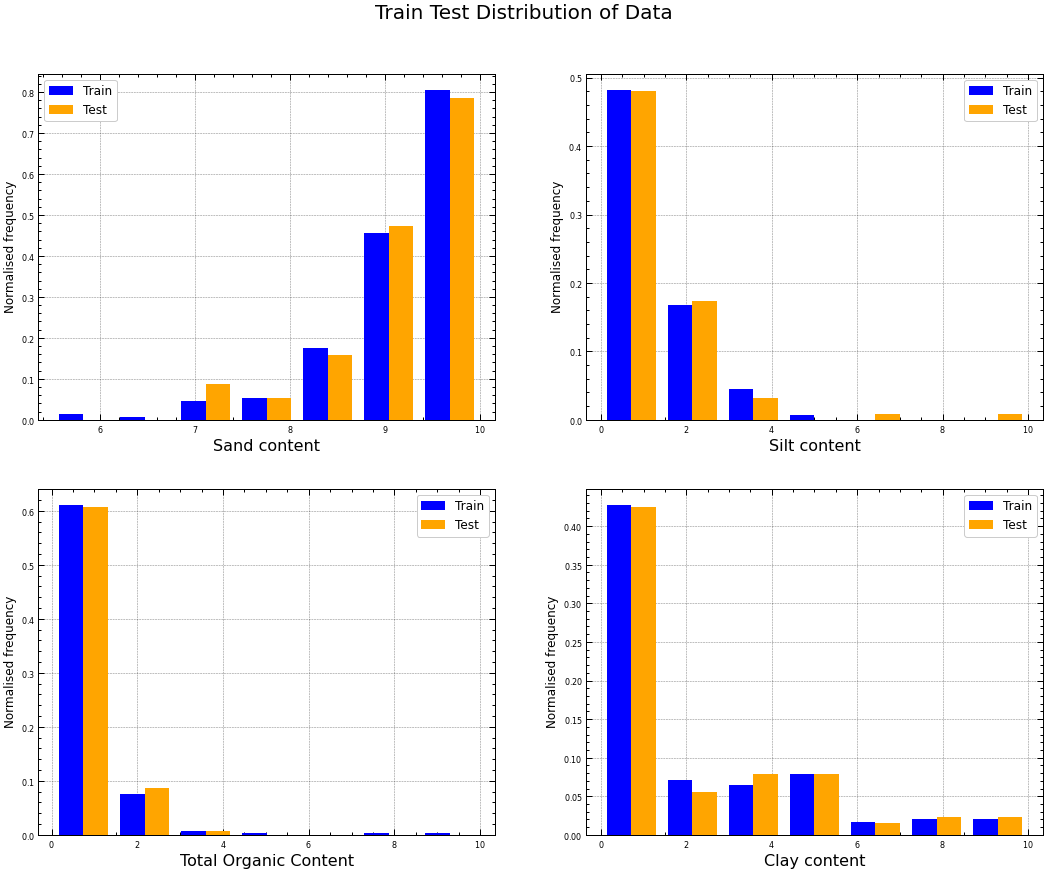

In [451]:
# ## Plotting the Distribution of Train and Test Output Data 
plt.style.use(['science','notebook','grid'])

fig, ax = plt.subplots(2,2, figsize=(18,14))

minSand = np.min(y_sand)
maxSand = np.max(y_sand)

binsSand = np.linspace(minSand, maxSand, 8)
# density =True : used to normalise bin heights to make the integral of  histogram 1.
ax[0][0].hist([ySand_train, ySand_test], binsSand , label=['Train', 'Test'], density=True, color = ['blue','orange'])
# results in error when yN_train/ yN_test is data frame or ndarray
ax[0][0].legend(loc='upper left', fontsize =12)
ax[0][0].set_xlabel('Sand content',fontsize =16)
ax[0][0].set_ylabel('Normalised frequency',fontsize =12)
ax[0][0].tick_params(axis='both', labelsize=8)

minSilt = np.min(y_silt)
maxSilt = np.max(y_silt)

binsSilt = np.linspace(minSilt, maxSilt, 8)
# density =True : used to normalise bin heights to make the integral of  histogram 1.
ax[0][1].hist([ySilt_train, ySilt_test], binsSilt , label=['Train', 'Test'], density=True, color = ['blue','orange'])
# results in error when yN_train/ yN_test is data frame or ndarray
ax[0][1].legend(loc='upper right', fontsize =12)
ax[0][1].set_xlabel('Silt content',fontsize =16)
ax[0][1].set_ylabel('Normalised frequency',fontsize =12)
ax[0][1].tick_params(axis='both', labelsize=8)

minClay = np.min(y_clay)
maxClay = np.max(y_clay)

binsClay = np.linspace(minClay, maxClay, 8)
# density =True : used to normalise bin heights to make the integral of  histogram 1.
ax[1][1].hist([yClay_train, yClay_test], binsClay , label=['Train', 'Test'], density=True, color = ['blue','orange'])
# results in error when yN_train/ yN_test is data frame or ndarray
ax[1][1].legend(loc='upper right', fontsize =12)
ax[1][1].set_xlabel('Clay content',fontsize =16)
ax[1][1].set_ylabel('Normalised frequency',fontsize =12)
ax[1][1].tick_params(axis='both', labelsize=8)

minTOC = np.min(y_toc)
maxTOC = np.max(y_toc)

binsTOC = np.linspace(minTOC, maxTOC, 8)
# density =True : used to normalise bin heights to make the integral of  histogram 1.
ax[1][0].hist([yTOC_train, yTOC_test], binsTOC , label=['Train', 'Test'], density=True, color = ['blue','orange'])
# results in error when yN_train/ yN_test is data frame or ndarray
ax[1][0].legend(loc='upper right', fontsize =12)
ax[1][0].set_xlabel('Total Organic Content',fontsize =16)
ax[1][0].set_ylabel('Normalised frequency',fontsize =12)
ax[1][0].tick_params(axis='both', labelsize=8)

fig.suptitle('Train Test Distribution of Data', x = 0.5 ,y = .95, fontsize = 20)

plt.show()

# Step 4: Training the Model

        - Create a linear regr object
        - Apply fit function (using regr object) on training data
        - Check the weights/parameters generated by fit function 

In [460]:
from sklearn import linear_model

regSand = linear_model.LinearRegression()
regSilt = linear_model.LinearRegression()
regClay = linear_model.LinearRegression()
regTOC = linear_model.LinearRegression()

# train the model using X_train and y_train (identified in previous step)

regSand.fit(XSand_train, ySand_train)
regSilt.fit(XSilt_train, ySilt_train)
regClay.fit(XClay_train, yClay_train)
regTOC.fit(XTOC_train, yTOC_train)

# print ('Sand Model \n')
# print ('Coefficients: ', regSand.coef_)
# print ('Intercept: ', regSand.intercept_)

# print ('\n Silt Model \n')
# print ('Coefficients: ', regSilt.coef_)
# print ('Intercept: ', regSilt.intercept_)

# print ('\n Clay Model \n')
# print ('Coefficients: ', regClay.coef_)
# print ('Intercept: ', regClay.intercept_)

# print ('\n TOC Model \n')
# print ('Coefficients: ', regTOC.coef_)
# print ('Intercept: ', regTOC.intercept_)

LinearRegression()

# Step 5: Prediction on Test Data 

In [461]:
# Predition using the trained-Model on the "Test Data"

ySand_pred = regSand.predict(XSand_test)
ySand_pred = np.round(ySand_pred, 2)

ySilt_pred = regSilt.predict(XSilt_test)
ySilt_pred = np.round(ySilt_pred, 2)

yClay_pred = regClay.predict(XClay_test)
yClay_pred = np.round(yClay_pred, 2)

yTOC_pred = regTOC.predict(XTOC_test)
yTOC_pred = np.round(yTOC_pred, 2)


# Step 6: Model Accuracy and Plots

###  Model Accuracy  (Sand)

In [462]:
#  Mean percentage error
#error = np.mean(abs((ySand_pred - ySand_test)/ySand_test))

#  Calculate the rmse for training data
yhatSand_pred = regSand.predict(XSand_train)
mseTrain = mean_squared_error(ySand_train, yhatSand_pred)
rmseTrain = np.sqrt(mseTrain)
#  Calculate the rmse for testing data
mseTest = mean_squared_error(ySand_test, ySand_pred)
rmseTest = np.sqrt(mseTest)

print('Sand Model Accuracy') 
#print('Mean Percentage Error:', error*100)  
print('Root Mean Square Error (Training): %.3f' % rmseTrain)
print('Root Mean Square Error (Testing): %.3f' % rmseTest)
rmseSand = rmseTest

Sand Model Accuracy
Root Mean Square Error (Training): 0.000
Root Mean Square Error (Testing): 0.847


###  Model Accuracy  (Silt)

In [463]:
#  Mean percentage error

#  Calculate the rmse for training data
yhatSilt_pred = regSilt.predict(XSilt_train)
mseTrain = mean_squared_error(ySilt_train, yhatSilt_pred)
rmseTrain = np.sqrt(mseTrain)
#  Calculate the rmse for testing data
mseTest = mean_squared_error(ySilt_test, ySilt_pred)
rmseTest = np.sqrt(mseTest)

print('Silt Model Accuracy')   
print('Root Mean Square Error (Training): %.3f' % rmseTrain)
print('Root Mean Square Error (Testing): %.3f' % rmseTest)
rmseSilt = rmseTest

Silt Model Accuracy
Root Mean Square Error (Training): 0.000
Root Mean Square Error (Testing): 1.697


###  Model Accuracy  (Clay)

In [464]:
#  Mean percentage error

#  Calculate the rmse for training data
yhatClay_pred = regClay.predict(XClay_train)
mseTrain = mean_squared_error(yClay_train, yhatClay_pred)
rmseTrain = np.sqrt(mseTrain)
#  Calculate the rmse for testing data
mseTest = mean_squared_error(yClay_test, yClay_pred)
rmseTest = np.sqrt(mseTest)

print('Clay Model Accuracy') 
print('Root Mean Square Error (Training): %.3f' % rmseTrain)
print('Root Mean Square Error (Testing): %.3f' % rmseTest)
rmseClay = rmseTest

Clay Model Accuracy
Root Mean Square Error (Training): 0.000
Root Mean Square Error (Testing): 2.494


###  Model Accuracy  (TOC)

In [465]:
#  Mean percentage error

#  Calculate the rmse for training data
yhatTOC_pred = regTOC.predict(XTOC_train)
mseTrain = mean_squared_error(yTOC_train, yhatTOC_pred)
rmseTrain = np.sqrt(mseTrain)
#  Calculate the rmse for testing data
mseTest = mean_squared_error(yTOC_test, yTOC_pred)
rmseTest = np.sqrt(mseTest)

print('Total Organic Content Model Accuracy') 
#print('Mean Percentage Error:', error*100)  
print('Root Mean Square Error (Training): %.3f' % rmseTrain)
print('Root Mean Square Error (Testing): %.3f' % rmseTest)
rmseTOC = rmseTest

Total Organic Content Model Accuracy
Root Mean Square Error (Training): 0.000
Root Mean Square Error (Testing): 1.564


In [466]:
# Merging actual and predicted (Test data) in one data frame for plots
ySand_tp = pd.DataFrame({'actual':ySand_test.values, 'predic': ySand_pred})
ySand_sortedA = ySand_tp.sort_values(by =['actual'])
ySand_srtA = ySand_sortedA.reset_index(drop=True)

ySilt_tp = pd.DataFrame({'actual':ySilt_test.values, 'predic': ySilt_pred})
ySilt_sortedA = ySilt_tp.sort_values(by =['actual'])
ySilt_srtA = ySilt_sortedA.reset_index(drop=True)

yClay_tp = pd.DataFrame({'actual':yClay_test.values, 'predic': yClay_pred})
yClay_sortedA = yClay_tp.sort_values(by =['actual'])
yClay_srtA = yClay_sortedA.reset_index(drop=True)

yTOC_tp = pd.DataFrame({'actual':yTOC_test.values, 'predic': yTOC_pred})
yTOC_sortedA = yTOC_tp.sort_values(by =['actual'])
yTOC_srtA = yTOC_sortedA.reset_index(drop=True)

In [468]:
# Plots for Visualising the Model Accuracy
plt.style.use(['science','notebook','grid'])

def plot_pred_acc (target):

    fig, axes = plt.subplots(1,1, figsize=(8,7))

    if target == 'sand':
        ySand_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = balu)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(1, 11, 'SAND', fontsize = 20, color = balu)
        plt.text(1, 10.2, 'RMSE ={:.2f}'.format(rmseSand), fontsize = 16)

    elif target == 'clay':
        yClay_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = mati)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(1, 11, 'CLAY', fontsize = 20, color = mati)
        plt.text(1, 10.2, 'RMSE ={:.2f}'.format(rmseClay), fontsize = 16)
        
    elif target == 'silt':
        ySilt_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = kado)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(1, 11, 'SILT', fontsize = 20, color = kado)
        plt.text(1, 10.2, 'RMSE ={:.2f}'.format(rmseSilt), fontsize = 16)

    elif target == 'TOC':
        yTOC_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = 'green')
        axes.tick_params(axis='both', labelsize=10)
        plt.text(1, 11, 'TOC', fontsize = 20, color = 'green')
        plt.text(1, 10.2, 'RMSE ={:.2f}'.format(rmseTOC), fontsize = 16)
        
    else:  
        ySand_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = balu)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(3, 11, 'SAND', fontsize = 20, color = balu)
        yClay_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = mati)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(3, 10, 'CLAY', fontsize = 20, color = mati)
        ySilt_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = kado)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(1, 11, 'SILT', fontsize = 20, color = kado)
        yTOC_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = 'green')
        axes.tick_params(axis='both', labelsize=10)
        plt.text(1, 10, 'TOC', fontsize = 20, color = 'green')

    fig.suptitle('Predictions on "Test" Data', x = 0.5 ,y = .95, fontsize=20)
    plt.xlim([0, 12])
    plt.ylim([0, 12])
    plt.show()

ipywidgets.interact(plot_pred_acc, target = ['sand', 'clay', 'silt', 'TOC', 'All'])


interactive(children=(Dropdown(description='target', options=('sand', 'clay', 'silt', 'TOC', 'All'), value='sa…

<function __main__.plot_pred_acc(target)>